Challenge Set 3  
Topic:        Linear Splitting  
Date:         07/22/2016  
Name:         Brian Cocolicchio  

** Challenge 1** Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [33]:
Movies2013.dtypes

Title                  object
Budget                float64
DomesticTotalGross      int64
Director               object
Rating                 object
Runtime                 int64
ReleaseDate            object
constant                int64
dtype: object

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy
import patsy
import statsmodels.formula.api as sm

%matplotlib inline
file ='/home/brianc/Brians Metis work/2013_movies.csv'
Movies = pd.read_csv(file)
Movies['ReleaseDate'] = pd.to_datetime(Movies.ReleaseDate)
Movies['ReleaseMonth'] = Movies.ReleaseDate.dt.month
Movies = Movies.dropna()

#Movies['DomesticTotalGross'] = Movies.DomesticTotalGross.astype(float)

NoTrend = sm.ols('DomesticTotalGross ~ 1',data= Movies).fit()
print(NoTrend.summary())

                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Mon, 25 Jul 2016   Prob (F-statistic):                nan
Time:                        00:19:28   Log-Likelihood:                -1714.4
No. Observations:                  87   AIC:                             3431.
Df Residuals:                      86   BIC:                             3433.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.035e+08   9.43e+06     10.975      0.0

In [28]:
NoTrendObj = pd.DataFrame(NoTrend.resid,columns=['Residual'])
NoTrendObj['Residual']=NoTrendObj['Residual']/1e+06
NoTrendObj['Fit']=NoTrend.fittedvalues/1e+06
NoTrendObj['Observed']=Movies['DomesticTotalGross']/1e+06


/home/brianc/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


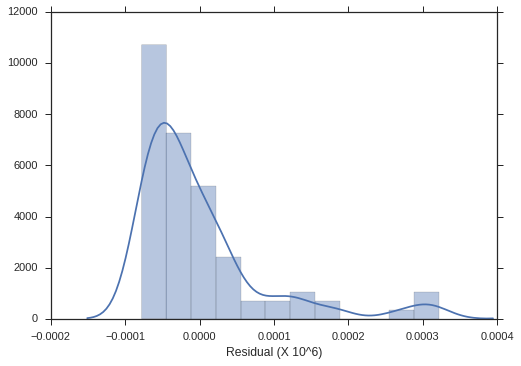

In [40]:
sn.distplot(NoTrendObj.Residual)
plt.xlabel('Residual (X 10^6)')

The residuals are skewed to the right.

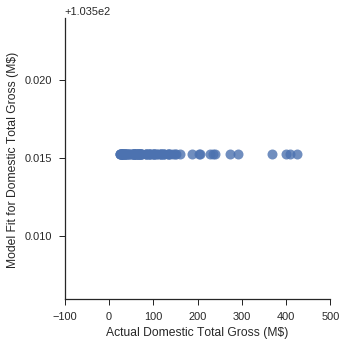

In [22]:
sn.set_context("notebook", font_scale=1.1)
sn.set_style("ticks")

sn.lmplot('Observed', 'Fit', data=NoTrendObj, fit_reg=False,scatter_kws={"marker": "D","s": 100})

plt.xlabel('Actual Domestic Total Gross (M$)')
plt.ylabel('Model Fit for Domestic Total Gross (M$) ')

The plot of the fitted data vs. the observed data show that there is no trend in the model.

**Challenge 2** Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [31]:
Trend1 = sm.ols('DomesticTotalGross ~ Runtime',data= Movies).fit()
print(Trend1.summary())

                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     6.458
Date:                Sun, 24 Jul 2016   Prob (F-statistic):             0.0129
Time:                        16:03:15   Log-Likelihood:                -1711.2
No. Observations:                  87   AIC:                             3426.
Df Residuals:                      85   BIC:                             3431.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -4.384e+07   5.87e+07     -0.747      0.4

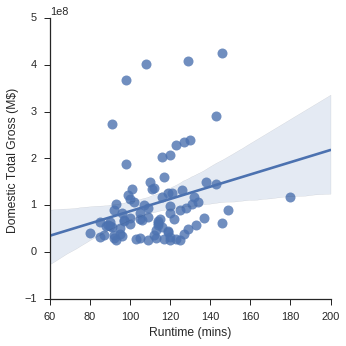

In [53]:
OneParam = pd.DataFrame(Trend1.resid_pearson,columns=['Residual'])
OneParam['Fit']=Trend1.fittedvalues/1e+06
OneParam['Observed']=Movies['DomesticTotalGross']/1e+06
OneParam['Runtime']=Movies['Runtime']
OneParam.dropna(axis=0,inplace = True)

sn.set_context("notebook", font_scale=1.1)
sn.set_style("ticks")

sn.lmplot('Runtime', 'DomesticTotalGross', data=Movies, fit_reg=True,scatter_kws={"marker": "D","s": 100})

plt.xlabel('Runtime (mins)')
plt.ylabel('Domestic Total Gross (M$) ')

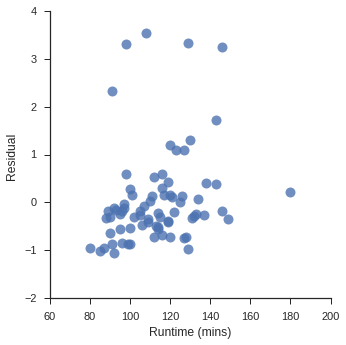

In [59]:
sn.set_context("notebook", font_scale=1.1)
sn.set_style("ticks")

sn.lmplot('Runtime', 'Residual', data=OneParam, fit_reg=False,scatter_kws={"marker": "D","s": 100})
plt.xlabel('Runtime (mins)')
plt.ylabel('Residual ')

The plot of the Pearson residuals vs. runtime show a number of data points that could be considered outliers.  

**Challenge 3** Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [69]:
CatPred = sm.ols('DomesticTotalGross ~ Runtime + C(Rating)',data= Movies).fit()
print(CatPred.summary())

                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     5.197
Date:                Mon, 25 Jul 2016   Prob (F-statistic):            0.00244
Time:                        00:09:28   Log-Likelihood:                -1706.9
No. Observations:                  87   AIC:                             3422.
Df Residuals:                      83   BIC:                             3432.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept          -2.216e+07   5.72

The p-value for the F-statistic shows that there is at least one parameter that does not equal zero with there being enough evidence to show that the effect of runtime and R-ratings have a statistically significant effect on the Domestic Total Gross of a movie.  However, there are problems with the model.  The model only explains 12.8% of the variation in the model on an adjusted basis.  There are possible problems with the normality assumption as well.

In [63]:
twoParam = pd.DataFrame(CatPred.resid_pearson,columns=['Residual'])
twoParam['Fit']=CatPred.fittedvalues/1e+06
twoParam['Observed']=Movies['DomesticTotalGross']/1e+06
twoParam['Runtime']=Movies['Runtime']
twoParam['Rating']=Movies['Rating']
twoParam.dropna(axis=0,inplace = True)


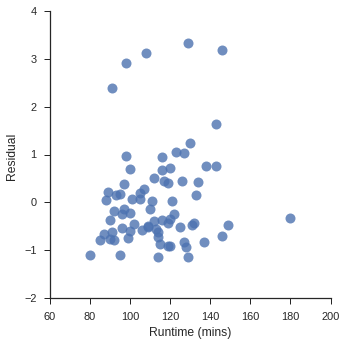

In [64]:
sn.set_context("notebook", font_scale=1.1)
sn.set_style("ticks")

sn.lmplot('Runtime', 'Residual', data=twoParam, fit_reg=False,scatter_kws={"marker": "D","s": 100})
plt.xlabel('Runtime (mins)')
plt.ylabel('Residual ')

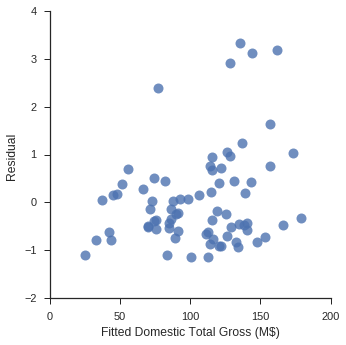

In [65]:
sn.set_context("notebook", font_scale=1.1)
sn.set_style("ticks")

sn.lmplot('Fit', 'Residual', data=twoParam, fit_reg=False,scatter_kws={"marker": "D","s": 100})
plt.xlabel('Fitted Domestic Total Gross (M$)')
plt.ylabel('Residual ')

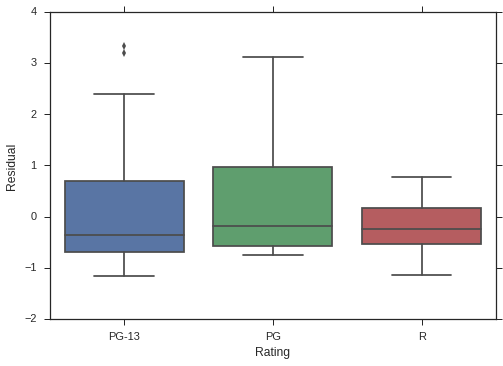

In [70]:
sn.set_context("notebook", font_scale=1.1)
sn.set_style("ticks")

sn.boxplot('Rating', 'Residual', data=twoParam)
plt.xlabel('Rating')
plt.ylabel('Residual ')

**Challenge 4** Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [88]:
mod2 = sm.ols('np.log(DomesticTotalGross) ~  Runtime + C(Rating)',data= Movies).fit()
print(mod2.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(DomesticTotalGross)   R-squared:                       0.167
Model:                                    OLS   Adj. R-squared:                  0.136
Method:                         Least Squares   F-statistic:                     5.529
Date:                        Mon, 25 Jul 2016   Prob (F-statistic):            0.00164
Time:                                00:34:23   Log-Likelihood:                -85.921
No. Observations:                          87   AIC:                             179.8
Df Residuals:                              83   BIC:                             189.7
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------

**Challenge 5** Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [83]:
from sklearn.cross_validation import train_test_split
train = Movies.sample(frac=0.8, random_state=1)
test = Movies.loc[~Movies.index.isin(train.index)]

mod3 = sm.ols('np.log(DomesticTotalGross) ~  Runtime + C(Rating)',data= train).fit()
print(mod3.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(DomesticTotalGross)   R-squared:                       0.221
Model:                                    OLS   Adj. R-squared:                  0.185
Method:                         Least Squares   F-statistic:                     6.233
Date:                        Mon, 25 Jul 2016   Prob (F-statistic):           0.000860
Time:                                00:26:26   Log-Likelihood:                -63.160
No. Observations:                          70   AIC:                             134.3
Df Residuals:                              66   BIC:                             143.3
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------

In [86]:
mod4 = sm.ols('np.log(DomesticTotalGross) ~  Runtime + C(Rating)',data= test).fit()
print(mod4.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(DomesticTotalGross)   R-squared:                       0.293
Model:                                    OLS   Adj. R-squared:                  0.129
Method:                         Least Squares   F-statistic:                     1.792
Date:                        Mon, 25 Jul 2016   Prob (F-statistic):              0.198
Time:                                00:33:14   Log-Likelihood:                -17.908
No. Observations:                          17   AIC:                             43.82
Df Residuals:                              13   BIC:                             47.15
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------

/home/brianc/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1557: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


In [90]:
mod4Param = pd.DataFrame(mod4.resid_pearson,columns=['Residual'])
mod4Param['Fit']=mod4.fittedvalues/1e+06
mod4Param['Observed']=Movies['DomesticTotalGross']/1e+06
mod4Param['Runtime']=Movies['Runtime']
mod4Param['Rating']=Movies['Rating']
mod4Param.dropna(axis=0,inplace = True)

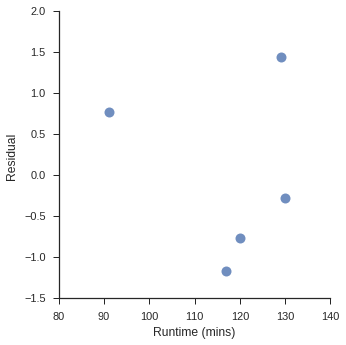

In [91]:
sn.set_context("notebook", font_scale=1.1)
sn.set_style("ticks")

sn.lmplot('Runtime', 'Residual', data=mod4Param, fit_reg=False,scatter_kws={"marker": "D","s": 100})
plt.xlabel('Runtime (mins)')
plt.ylabel('Residual ')

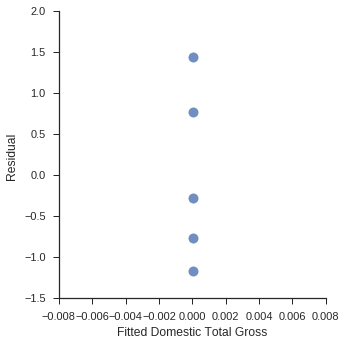

In [92]:
sn.set_context("notebook", font_scale=1.1)
sn.set_style("ticks")

sn.lmplot('Fit', 'Residual', data=mod4Param, fit_reg=False,scatter_kws={"marker": "D","s": 100})
plt.xlabel('Fitted Domestic Total Gross')
plt.ylabel('Residual ')